# ライブラリ

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

# データ読み込み

In [4]:
batting_df = pd.read_csv("../../data/2019dragons-batting.csv")

In [5]:
pitching_df = pd.read_csv("../../data/2019dragons-pitching.csv")

In [6]:
batting_df.loc[batting_df["Name"].isin(pitching_df["Name"]), "Pitch"] = 1
batting_df.loc[~batting_df["Name"].isin(pitching_df["Name"]), "Pitch"] = -1

In [7]:
y = batting_df.Pitch.values

In [8]:
X = batting_df.loc[:, ["H", "SH"]].values

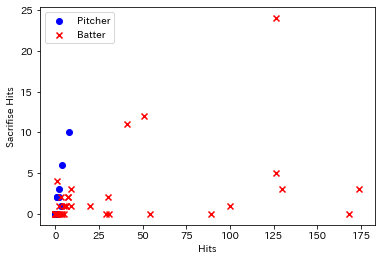

In [9]:
plt.scatter(batting_df[batting_df.Pitch == 1].loc[:, "H"].values, batting_df[batting_df.Pitch == 1].loc[:, "SH"].values, color="blue", marker="o", label="Pitcher")
plt.scatter(batting_df[batting_df.Pitch == -1].loc[:, "H"].values, batting_df[batting_df.Pitch == -1].loc[:, "SH"].values, color="red", marker="x", label="Batter")
plt.xlabel("Hits")
plt.ylabel("Sacrifise Hits")
plt.legend(loc="upper left")

# 学習(adaline)

In [18]:
import adaline
import plot_decision_regions as pdr

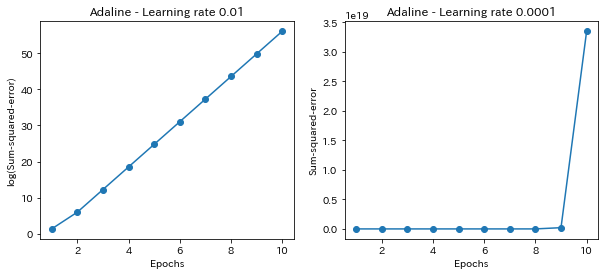

In [15]:
# 描画領域を 1行2列 に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Learning rate = 0.01
ada1 = adaline.AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
# Learning rate = 0.0001
ada2 = adaline.AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [26]:
# 標準化
X = X.astype("float")
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [27]:
X_std

array([[ 2.37643752,  0.23697104],
       [-0.51204307, -0.50182103],
       [ 0.67469702, -0.50182103],
       [ 0.38360983,  2.20708323],
       [ 0.13730528, -0.00929298],
       [ 0.1596966 , -0.50182103],
       [-0.53443439, -0.50182103],
       [-0.53443439, -0.50182103],
       [ 1.4583933 , -0.50182103],
       [-0.53443439, -0.50182103],
       [ 1.70469785, -0.25555701],
       [ 0.11491396, -0.50182103],
       [-0.51204307, -0.50182103],
       [-0.48965175, -0.50182103],
       [-0.51204307, -0.50182103],
       [-0.40008646, -0.25555701],
       [-0.40008646, -0.25555701],
       [-0.51204307, -0.50182103],
       [ 0.60752305,  2.45334725],
       [-0.53443439, -0.50182103],
       [-0.48965175, -0.25555701],
       [-0.08660795, -0.25555701],
       [ 2.28687223,  5.40851553],
       [-0.51204307, -0.00929298],
       [-0.53443439, -0.50182103],
       [-0.37769514, -0.00929298],
       [-0.37769514, -0.00929298],
       [-0.53443439, -0.50182103],
       [-0.53443439,

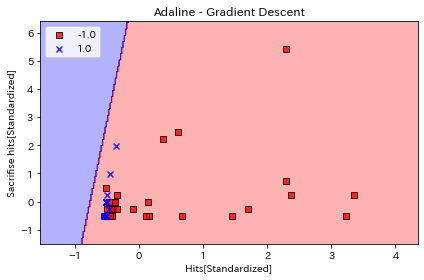

In [28]:
ada = adaline.AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

pdr.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Hits[Standardized]')
plt.ylabel('Sacrifise hits[Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

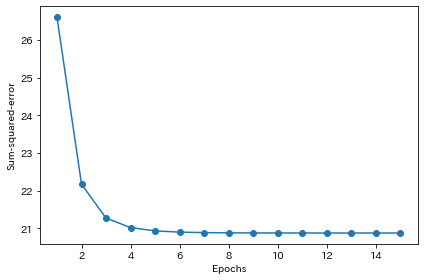

In [29]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

# 学習(adalineSGD)

In [21]:
import adalineSGD

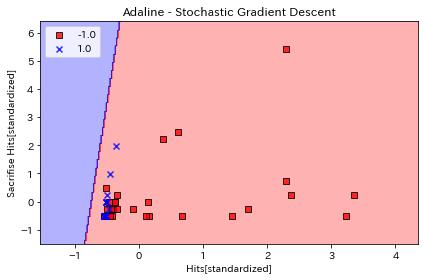

In [30]:
ada = adalineSGD.AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

pdr.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Hits[standardized]')
plt.ylabel('Sacrifise Hits[standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

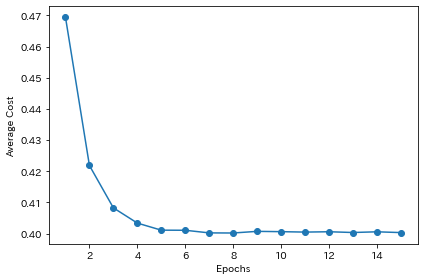

In [31]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

In [32]:
ada.partial_fit(X_std[0, :], y[0])